In [1]:
import pandas as pd
import matplotlib.pyplot as plt

 # Section 1: Business Intelligence

## Part 1

### 1.1.a Import the Dataset

In [5]:
fraudDf = pd.read_csv("databreachcases-cleaned.csv")
fraudDf.head()

,date,company,state,breach,org,records
0,3/3/2006,PayDayOKLLC,NJ,HACK,BSF,88.0
1,1/4/2012,SFFireCreditUnionPacifica-CoastsideCreditUnion,CA,PORT,BSF,0.0
2,2/18/2012,BDOUSARubio'sRestaurants,CA,PORT,BSR,0.0
3,2/22/2012,DHIMortgageCompanyLtd.,TX,HACK,BSF,0.0
4,3/12/2012,ImpairmentResourcesLLC,CA,PORT,MED,14000.0


### 1.1.b Quality Assesment

#### 1.1.b.i Check Data Types

In [8]:
fraudDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084 entries, 0 to 7083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7084 non-null   object 
 1   company  7082 non-null   object 
 2   state    7084 non-null   object 
 3   breach   7084 non-null   object 
 4   org      7084 non-null   object 
 5   records  7084 non-null   float64
dtypes: float64(1), object(5)
memory usage: 332.2+ KB


date probably needs to become an datetime datatype

#### 1.1.b.ii Check Null Values

In [11]:
fraudDf.isnull().sum()

date       0
company    2
state      0
breach     0
org        0
records    0
dtype: int64

the 2 rows with company null value are fine unless we do any analysis involving company name

#### 1.1.b.iii Summary Statistics

In [14]:
fraudDf.describe()

,records
count,7.084000e+03
mean,8.648893e+05
std,1.996389e+07
min,0.000000e+00
25%,0.000000e+00
50%,8.080000e+02
75%,5.232500e+03
max,1.370000e+09


#### 1.1.b.iv Other Data Understanding Efforts

Since the describe is using scientific notation, it's probably better to visualize records with a boxplot

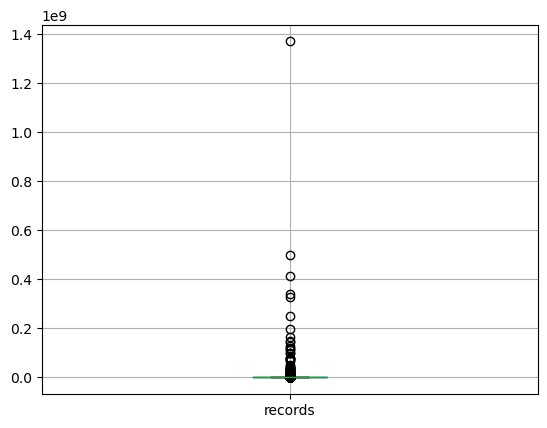

In [17]:
fraudDf.boxplot();
plt.show()

The row with 1.370000e+09 records seems way to high and is likely not a real response so I will drop this row in data cleaning

## Part 2

### 1.2.a Remove Whitespace from Column Names

In [21]:
fraudDf.columns = fraudDf.columns.str.replace(' ', '')
fraudDf.head(1)

,date,company,state,breach,org,records
0,3/3/2006,PayDayOKLLC,NJ,HACK,BSF,88.0


### 1.2.b Make Column Names Lowercase

In [23]:
fraudDf.columns = fraudDf.columns.str.lower()
fraudDf.head(1)

,date,company,state,breach,org,records
0,3/3/2006,PayDayOKLLC,NJ,HACK,BSF,88.0


### 1.2.c Check Data Types

In [25]:
fraudDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084 entries, 0 to 7083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7084 non-null   object 
 1   company  7082 non-null   object 
 2   state    7084 non-null   object 
 3   breach   7084 non-null   object 
 4   org      7084 non-null   object 
 5   records  7084 non-null   float64
dtypes: float64(1), object(5)
memory usage: 332.2+ KB


### 1.2.d Handle Date
#### 1.2.d.i Convert Datatype

In [27]:
fraudDf['date'] = pd.to_datetime(fraudDf['date'], format='%m/%d/%Y')
fraudDf.head(1)

,date,company,state,breach,org,records
0,2006-03-03,PayDayOKLLC,NJ,HACK,BSF,88.0


#### 1.2.d.ii Set Date as Index

In [29]:
fraudDf = fraudDf.set_index('date')
fraudDf.head(1)

,company,state,breach,org,records
date,,,,,
2006-03-03,PayDayOKLLC,NJ,HACK,BSF,88.0


#### 1.2.d.iii Sort Index

In [31]:
fraudDf = fraudDf.sort_index()
fraudDf.head(2)

,company,state,breach,org,records
date,,,,,
2005-01-10,GeorgeMasonUniversity,VA,HACK,EDU,32000.0
2005-01-18,UniversityofCaliforniaSanDiego,CA,HACK,EDU,3500.0


### 1.2.e Rows and Columns

In [33]:
print( 'Rows: ', fraudDf.shape[0])
print( 'Cols: ', fraudDf.shape[1])

Rows:  7084
Cols:  5


### 1.2.f Self-required Cleaning
I'm going to go ahead and drop the na rows just so I don't have to worry about it

In [35]:
fraudDf = fraudDf.dropna()
#There were 2 null values we found above so this should be 7084-2=7082
print( 'Rows: ', fraudDf.shape[0])

Rows:  7082


I also want to remove that outlier in records

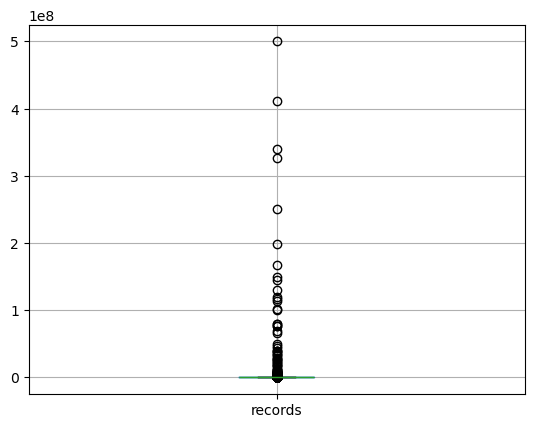

In [37]:
fraudDf = fraudDf[fraudDf['records']< 1.0e+09]
fraudDf.boxplot();
plt.show()

## Part 3 Business Intelligence

### 3.1 Basic Questions
#### 3.1.a Total Records Breached

In [40]:
print(fraudDf['records'].sum(), 'Total Records Breached')

4756873914.0 Total Records Breached


#### 3.1.b Average Records Breached

In [42]:
print(fraudDf['records'].mean(), 'Average Records Breached')

671779.9624346844 Average Records Breached


#### 3.1.c Organizations with the Biggest Breaches

In [44]:
fraudDf.sort_values('records', ascending=False)[["org", "records"]].head(10)

,org,records
date,,
2016-09-22,BSO,500000000.0
2016-11-16,BSO,412000000.0
2018-07-03,BSO,340000000.0
2018-11-30,BSR,327000000.0
2011-04-02,BSO,250000000.0
2017-06-19,BSO,198000000.0
2012-06-06,BSO,167000000.0
2018-03-30,BSR,150000000.0
2017-09-07,BSF,145500000.0


### 3.2 What types of data breaches are more common than others?
#### 3.2.a In terms of the number of incidents

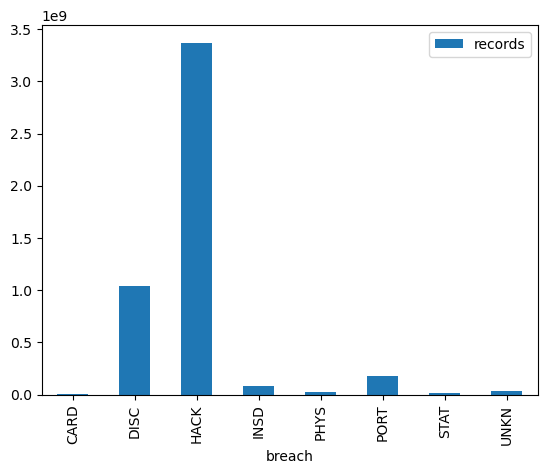

In [46]:
fraudDf.pivot_table(index=["breach"], values="records", aggfunc='sum').plot(kind='bar')
plt.show()

#### 3.2.b In terms of the number of records affected

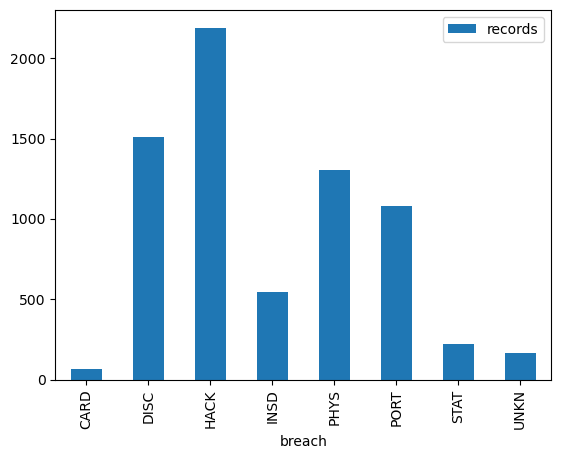

In [48]:
fraudDf.pivot_table(index=["breach"], values="records", aggfunc='count').plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
<b>Answer:</b> Hack had by far the most number of incidents and the most numbers of records effected
</div>

### 3.3 What types of organizations are more likely to have a data breach?
#### 3.3.a In terms of the number of incidents

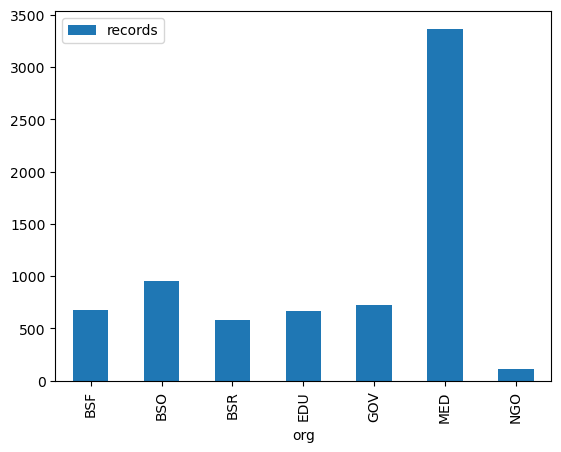

In [51]:
fraudDf.pivot_table(index=["org"], values="records", aggfunc='count').plot(kind='bar')
plt.show()

#### 3.3.b In terms of the number of records affected

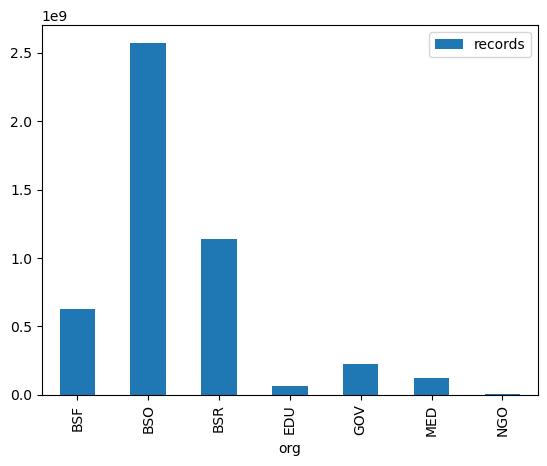

In [53]:
fraudDf.pivot_table(index=["org"], values="records", aggfunc='sum').plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
<b>Answer:</b> Healthcare organizations (MED) were most commonly targeted, but Busnisses in the "Other" category (BSO) were had the most affected records
</div>

### 3.4 States
#### 3.4.a Which States Are Most Likely To Have a Breach

In [56]:
fraudDf.pivot_table(index=["state"], values="records", aggfunc='count').sort_values("records", ascending=False)

,records
state,
CA,1116
NY,521
TX,480
FL,368
MD,306
...,...
Cheshire,1
Tokyo,1
Grand Bahama,1


<div class="alert alert-block alert-info">
<b>Answer:</b> California by far had the most breaches, almost doubling the next closest (New York)
</div>

#### 3.4.b What are the top three states regarding the number of data breaches in 2018?

In [59]:
breaches2018 = fraudDf.loc['2018']
breaches2018.pivot_table(index=["state"], values="records", aggfunc='count').sort_values("records", ascending=False).head(3)

,records
state,
CA,78
TX,26
MA,21


<div class="alert alert-block alert-info">
<b>Answer:</b> California, Texas, and Massachusetts had the most breaches in 2018 (in order of most to least)
</div>

### 3.5 Organizations & Data breaches
#### 3.5.a  Which organization type is more vulnerable to “Hackers”?

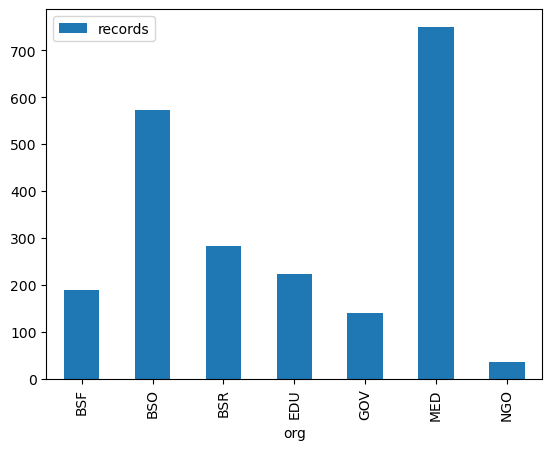

In [62]:
hackersDf = fraudDf[fraudDf["breach"] == "HACK"]
hackersDf.pivot_table(index=["org"], values="records", aggfunc='count').plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
<b>Answer:</b> Healthcare Organizations (MED) are most vulnerable to hackers
</div>

#### 3.5.b  Which organization type is more vulnerable to “CARD”?

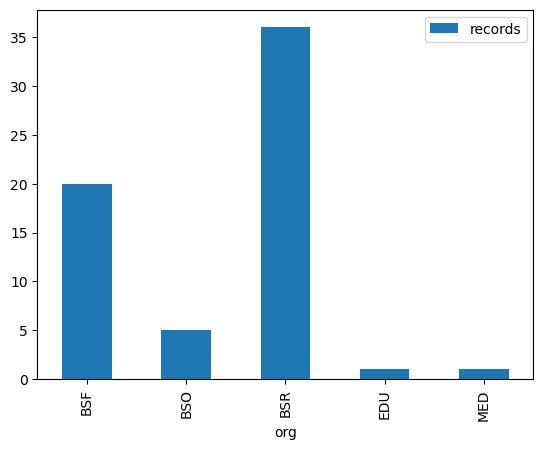

In [64]:
cardDf = fraudDf[fraudDf["breach"] == "CARD"]
cardDf.pivot_table(index=["org"], values="records", aggfunc='count').plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
<b>Answer:</b> Retail Businesses (BSR) are most vulnerable to CARD
</div>

### 3.6 US states & data breaches
#### 3.6.a Which state is more vulnerable to “Hackers”?

In [66]:
hackersDf.pivot_table(index=["state"], values="records", aggfunc='count').sort_values("records", ascending=False).head(1)

,records
state,
CA,412


<div class="alert alert-block alert-info">
<b>Answer:</b> California most vulnerable to hackers
</div>

#### 3.6.b Which state is more vulnerable to “CARD”?

In [68]:
cardDf.pivot_table(index=["state"], values="records", aggfunc='count').sort_values("records", ascending=False).head(1)

,records
state,
CA,12


<div class="alert alert-block alert-info">
<b>Answer:</b> California most vulnerable to CARD
</div>

### 3.7 Visualize data breaches over time (time series analysis – line chart). 
#### 3.7.a Visualize a time series first.

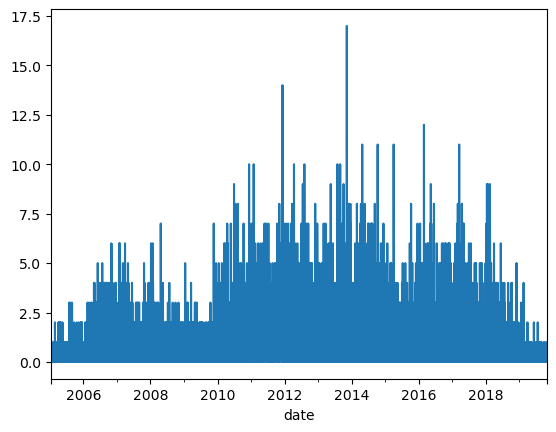

In [70]:
fraudDf.resample('D').size().plot()
plt.show()

This looks like a bar chart because of the all the jumping aroudn but it is a line chart

#### 3.7.b How many breaches per year?

In [72]:
fraudDf.resample('YE').size().sort_values(ascending=False)

date
2012-12-31    749
2014-12-31    741
2011-12-31    690
2013-12-31    682
2010-12-31    677
2016-12-31    612
2017-12-31    587
2006-12-31    440
2015-12-31    426
2007-12-31    389
2018-12-31    385
2008-12-31    309
2009-12-31    218
2005-12-31    118
2019-12-31     58
dtype: int64

### 3.8 Any relationship between time and data breach type? 
#### 3.8.a Has any data breach type increased over time?

In [152]:
fraudDfBreachDummies = pd.get_dummies(fraudDf, columns=['breach'])
fraudDfBreachDummies = fraudDfBreachDummies.drop(columns=["records"])
fraudDfBreachDummies.head()

,company,state,org,year,breach_CARD,breach_DISC,breach_HACK,breach_INSD,breach_PHYS,breach_PORT,breach_STAT,breach_UNKN
date,,,,,,,,,,,,
2005-01-10,GeorgeMasonUniversity,VA,EDU,2005,False,False,True,False,False,False,False,False
2005-01-18,UniversityofCaliforniaSanDiego,CA,EDU,2005,False,False,True,False,False,False,False,False
2005-01-22,UniversityofNorthernColorado,CO,EDU,2005,False,False,False,False,False,True,False,False
2005-02-12,ScienceApplicationsInternationalCorp.(SAIC),CA,BSO,2005,False,False,False,False,False,False,True,False
2005-02-18,UniversityofChicagoHospital,IL,MED,2005,False,False,False,True,False,False,False,False


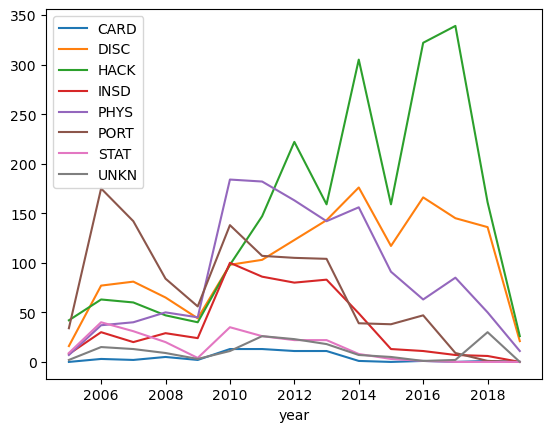

In [154]:
tempDf = fraudDfBreachDummies
tempDf['year'] = tempDf.index.year
breachByYear = tempDf.pivot_table(index="year", values=["breach_CARD", "breach_DISC",	"breach_HACK",	"breach_INSD",	"breach_PHYS",	"breach_PORT",	"breach_STAT",	"breach_UNKN"], aggfunc='sum')
breachByYear.columns = breachByYear.columns.str.replace('breach_', '')
breachByYear.plot()
plt.show()

<div class="alert alert-block alert-info">
<b>Answer A:</b> Hacks(HACK) and Insider Breaches (INSD) are going up
</div>
<div class="alert alert-block alert-info">
<b>Answer B:</b> Physical (PHYS) and portable device (PORT) related breaches are going down
</div>

### 3.9 Organizations that have experienced repeated incidents
#### 3.9.a How many organizations (“company”) have multiple data breaches (more than one data breach since 2005)?

In [172]:
companyPivot = fraudDf.pivot_table(index="company", values="breach", aggfunc="count")
companysMultipleBreach = companyPivot[companyPivot["breach"] > 1]
companysMultipleBreach.shape[0]

185

<div class="alert alert-block alert-info">
<b>Answer:</b> There were 185 companies with multiple breaches
</div>

#### 3.9.b This question extends the previous question a. What organizational or institutional types are closely associated with those organizations having multiple data breaches (more than one data breach between2005 and 2019)? 

In [214]:
companyOrgs = fraudDf[["company", "org"]]
companyOrgs = companyOrgs.reset_index(drop=True)
companyOrgs = companyOrgs.drop_duplicates(subset=['company'])
orgBreaches = companysMultipleBreach.join(companyOrgs.set_index('company')).pivot_table(index="org", values="breach", aggfunc='count')
orgBreaches.sort_values('breach',ascending=False)

,breach
org,
MED,83
BSF,34
BSR,28
BSO,22
GOV,12
EDU,5
NGO,1


<div class="alert alert-block alert-info">
<b>Answer:</b> Health Organizations (MED) had the most companies with multiple breaches, with almost half of companies with multiple breaches falling into that company
</div>

### 3.10 Kansas
#### 3.10.a What are Kansas's top five data breach cases regarding the number of records?

In [225]:
kansasDf = fraudDf[fraudDf['state'] == "KS"]
kansasDf.head()

,company,state,breach,org,records,year
date,,,,,,
2006-01-20,UniversityofKansas(KansasUniversity),KS,DISC,EDU,9200.0,2006
2006-07-18,U.S.DepartmentofAgriculture,KS,PORT,GOV,350.0,2006
2006-08-01,WichitaStateUniversity,KS,HACK,EDU,2000.0,2006
2007-01-28,SalinaRegionalHealthCenter,KS,PORT,MED,1100.0,2007
2007-09-19,KansasUniversity,KS,PHYS,EDU,0.0,2007


In [229]:
kansasDf.sort_values("records", ascending=False).head()

,company,state,breach,org,records,year
date,,,,,,
2017-07-21,KansasDepartmentofCommerce,KS,HACK,GOV,5500000.0,2017
2017-03-27,America'sJobLinkAlliance,KS,HACK,BSO,2100000.0,2017
2016-02-26,ValleyHopeAssociation,KS,PORT,MED,52076.0,2016
2013-10-10,CityofWichita-ElectronicProcurementWebsite,KS,HACK,GOV,29000.0,2013
2018-03-08,KansasDepartmentforAgingandDisabilityServices(...,KS,HACK,GOV,11000.0,2018


<div class="alert alert-block alert-info">
<b>Answer:</b> The top 5 breaches were:
    <ol>
        <li>KS Dept of Commerce in 2017</li>
        <li>Americas job link alliance in 2017</li>
        <li>Valley hope association in 2016</li>
        <li>City of Wichita in 2013</li>
        <li>KS Dept of Aging and Disability Services in 2018</li>
    </ol>
</div>

#### 3.10.b What is the trend of data breaches in Kansas since 2015?

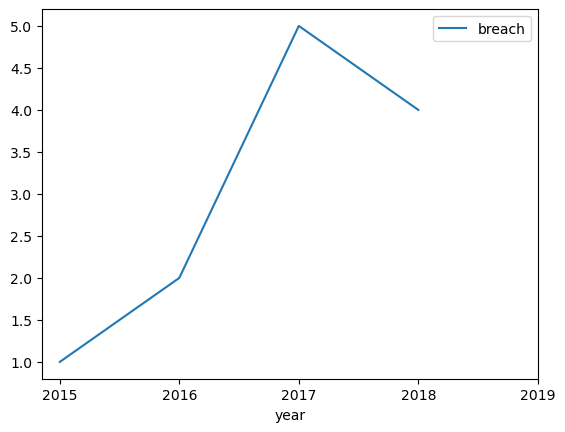

In [254]:
kansasDf = kansasDf[kansasDf["year"] >= 2015]
kansasDf.pivot_table(index="year", values="breach", aggfunc='count').plot().set_xticks([2015, 2016, 2017, 2018])
plt.show()

In [252]:
fraudDf.tail()

,company,state,breach,org,records,year
date,,,,,,
2019-08-19,WesternConnecticutHealthNetwork,CT,DISC,MED,1293.0,2019
2019-08-26,EmployersandLaborersLocals100and397Health&Welf...,MO,HACK,MED,560.0,2019
2019-09-18,WoodRanchMedical,CA,HACK,MED,5835.0,2019
2019-10-03,SanFranciscoDepartmentofPublicHealth,CA,DISC,MED,622.0,2019
2019-10-25,VirginiaDepartmentofBehavioralHealth&Developme...,VA,DISC,MED,1442.0,2019


<div class="alert alert-block alert-info">
<b>Answer:</b> Since there are records from late 2019, we can assume the dataset includes all of the 2018 data, so breaches in kanses peaked in 2017.
</div>

#### 3.10.c Own Question
Since MED organizations have the highest chance of repeat breaches, lets look at the previous question, but filter by MED so we can see how many organizations are at high risk of repeat breaches

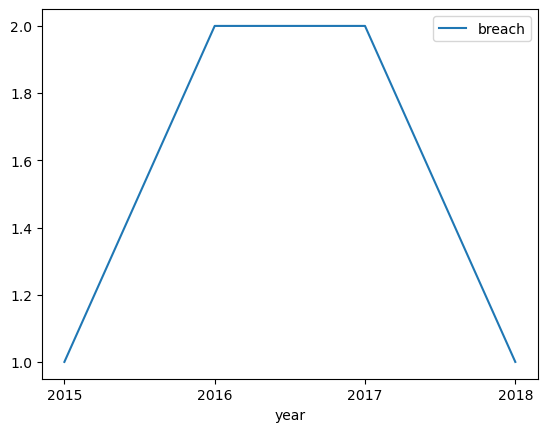

In [262]:
kansasDf = kansasDf[kansasDf["org"] == "MED"]
kansasDf.pivot_table(index="year", values="breach", aggfunc='count').plot().set_xticks([2015, 2016, 2017, 2018])
plt.show()

Looks like there only are 2-6, so lets find them and see where Kansas should focus its cyber security 

In [281]:
tempDf = fraudDf
tempDf = tempDf[tempDf["state"] == "KS"]
tempDf = tempDf[tempDf["org"] == "MED"]
tempDf = tempDf[tempDf["year"] >= 2015]
tempDf.reset_index()["company"]

0           ClinicalReferenceLaboratory
1                 ValleyHopeAssociation
2                  DecaturHealthSystems
3           FamilyMedicineEastChartered
4    EastCentralKansasAreaAgencyonAging
5           AtchisonHospitalAssociation
Name: company, dtype: object

<div class="alert alert-block alert-info">
<b>Answer:</b> See the about from the cell above for a list of companies in Kansas with a high chance of a second breach
</div>

# Section 2: Machine Learning

## Part 1

In [77]:
movieDf = pd.read_csv("movie_metadata.csv", encoding='utf-8')
movieDf.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Part 2

## Part 3